In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
url = '/content/drive/MyDrive/Colab Notebooks/Datasetmold_New800.csv'
df = pd.read_csv(url)
df

,Status,Grade,Customer,Part_aplication,Qty-Product,Injection(Ton),Resin_plastic,Texture-Product,Cavity.Material,Core.Material,Slide-System,Lift-Core-System,Mold-Design.Type,HOT-RUNNER,Mold/Base_Order-Company,Weight(KG),Price-Rp
0,Mahal,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
1,Mahal,3,BANSHU,MotorCycle,1,450,PP(GF20%),NO,HP4M,HP4M,YES,YES,2P SIDE GATE,NOTYET,BUMHAN(KOREA),1986,406000000
2,Mahal,4,KAON,Wireless,1,170,PC,NO,STAVAX,NAK80,YES,YES,3P PIN GATE,NOTYET,SEHYUN,590,334600000
3,Mahal,4,KAON,Wireless,1,170,ABS (V0),YES,SKD61,SKD61,NO,YES,3P PIN GATE,NOTYET,SEHYUN,484,341600000
4,Murah,3,KAON,Wireless,2,100,XG 569C,NO,STAVAX,NAK80,YES,NO,3P PIN GATE,NOTYET,SEHYUN,196,112000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Mahal,4,KITADA,Car,1,450,PC-ABS,NO,HP4M,HP4M,YES,YES,2P H.R VALVE 1 ZONE,YUDO-INDONESIA,JXMould(CHINA),1960,610554000
797,Mahal,3,KITADA,Car,2,220,PP,NO,HP4M,HP4M,YES,NO,2P SIDE GATE,NOTYET,GAYA,675,287770000
798,Murah,3,KITADA,Car,2,150,POM,NO,HP4M,HP4M,NO,NO,2P SIDE GATE,NOTYET,GAYA,273,206108000
799,Mahal,3,KITADA,Car,2,80,PA6,NO,2738,2738,YES,NO,2P SIDE GATE,NOTYET,GAYA,155,177912000


In [3]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [4]:
# Encode semua kolom non-numerik
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col].astype(str))

In [5]:
# Tetapkan 'Status' sebagai variabel target
y = df['Status']
X = df.drop('Status', axis=1)

In [6]:
# Encode target variable 'Status' (y)
y = label_encoder.fit_transform(y)

In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()

In [8]:
# Menampilkan matriks korelasi dengan fokus pada 'Status'
status_correlation = correlation_matrix['Status'].sort_values(ascending=False)
print("Correlation with Status (Mahal/Murah):")
print(status_correlation)

Correlation with Status (Mahal/Murah):
Status                     1.000000
Qty-Product                0.286580
Part_aplication            0.109622
Customer                   0.084717
Resin_plastic              0.043236
Mold/Base_Order-Company    0.005463
Texture-Product           -0.028726
Mold-Design.Type          -0.066733
Core.Material             -0.086699
Injection(Ton)            -0.090032
Lift-Core-System          -0.093634
HOT-RUNNER                -0.103003
Cavity.Material           -0.117215
Weight(KG)                -0.136707
Slide-System              -0.167423
Grade                     -0.225865
Price-Rp                  -0.251455
Name: Status, dtype: float64


In [9]:
# Filter attributes with strong correlation
threshold = 0.2
strong_correlation = status_correlation[(status_correlation > threshold) | (status_correlation < -threshold)]
print("\nAttributes with strong correlation with Status (>|0.2|):")
print(strong_correlation)


Attributes with strong correlation with Status (>|0.2|):
Status         1.000000
Qty-Product    0.286580
Grade         -0.225865
Price-Rp      -0.251455
Name: Status, dtype: float64


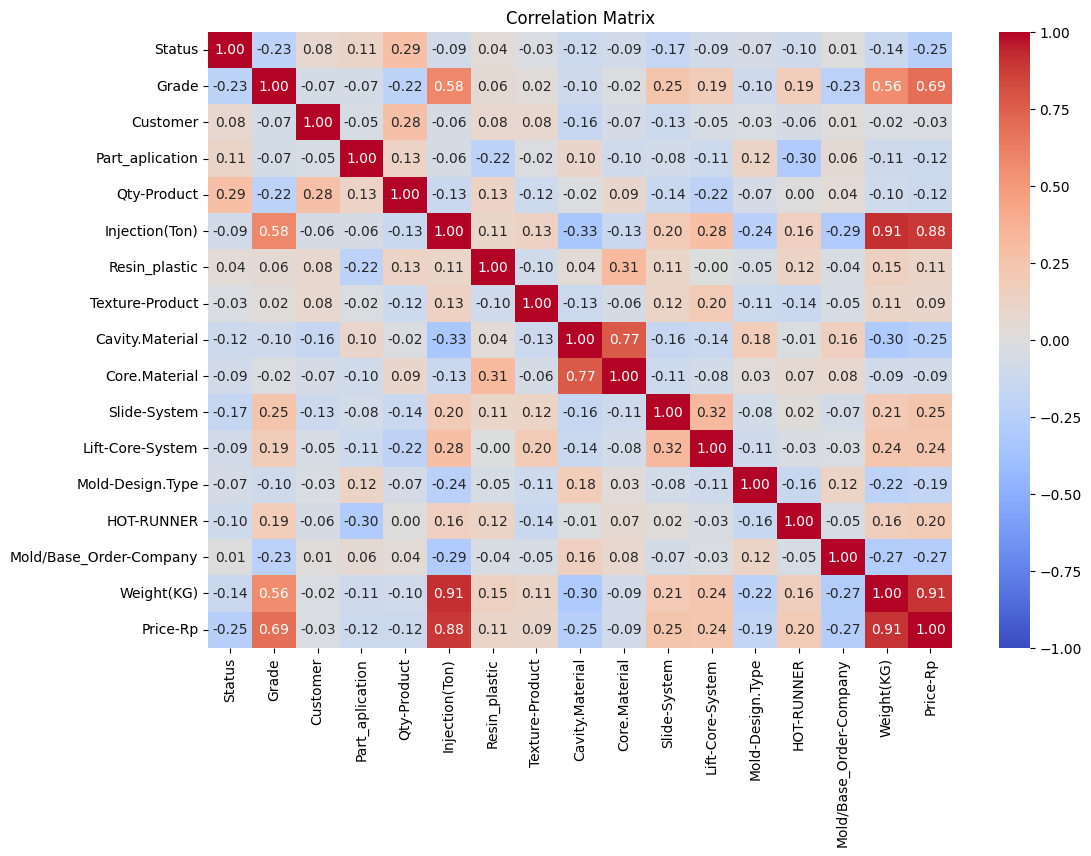

In [10]:
# Optionally, plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Buat daftar pasangan fitur dengan korelasi tinggi (di atas threshold tertentu, misalnya 0.5)
threshold = 0.7  # Threshold korelasi
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold]

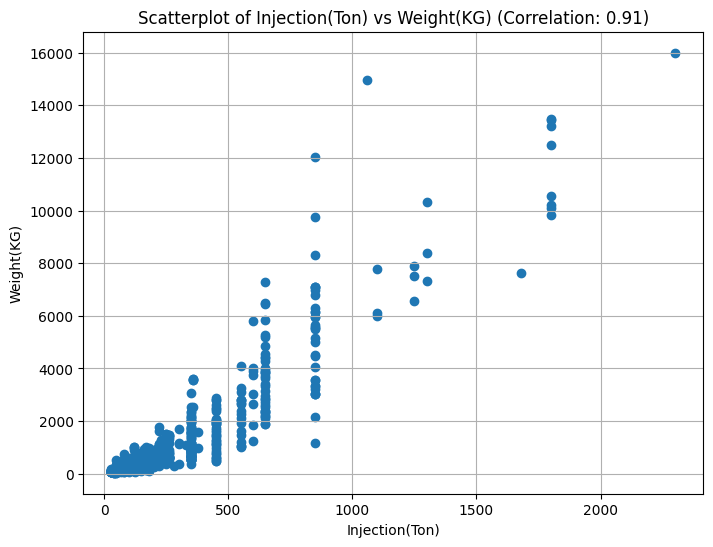

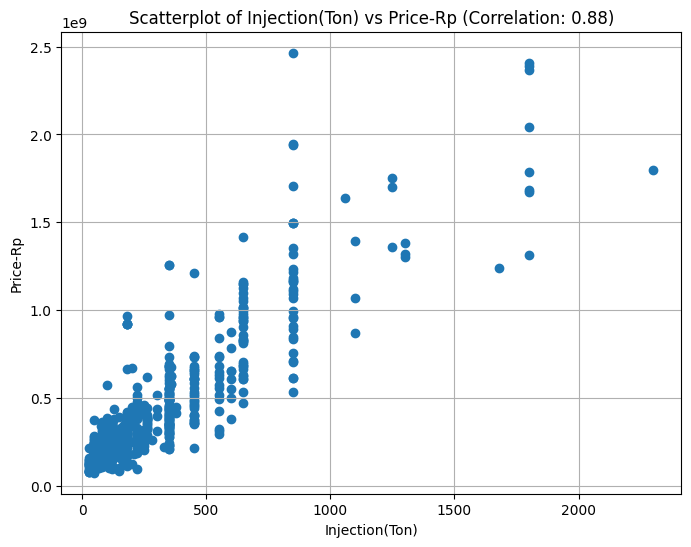

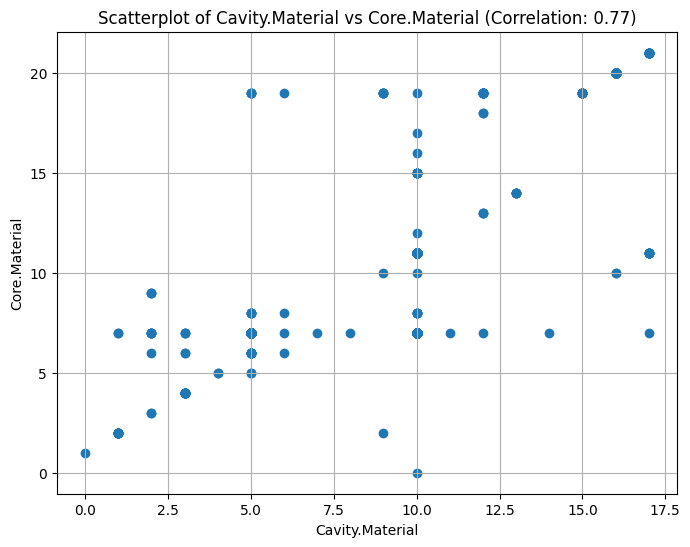

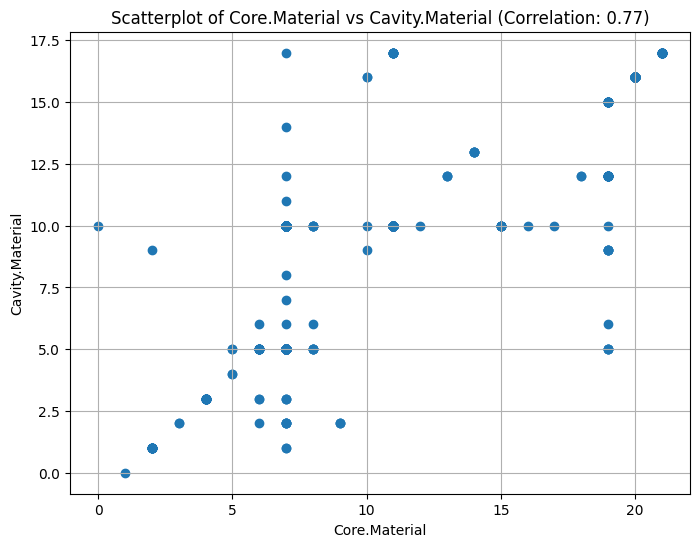

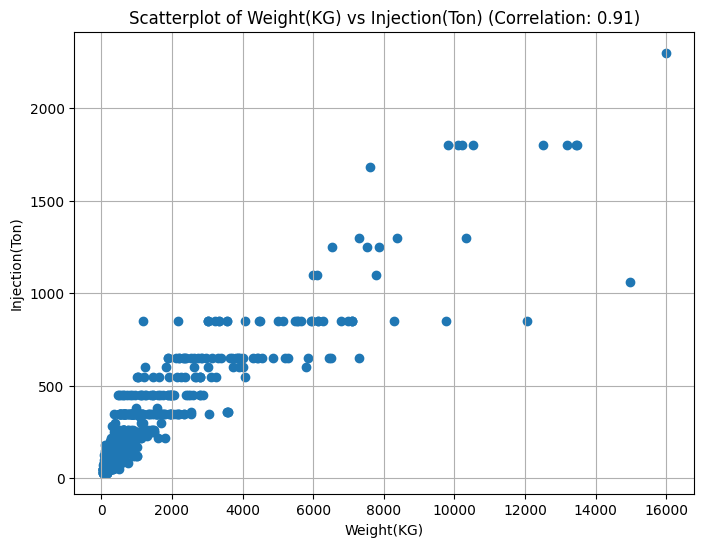

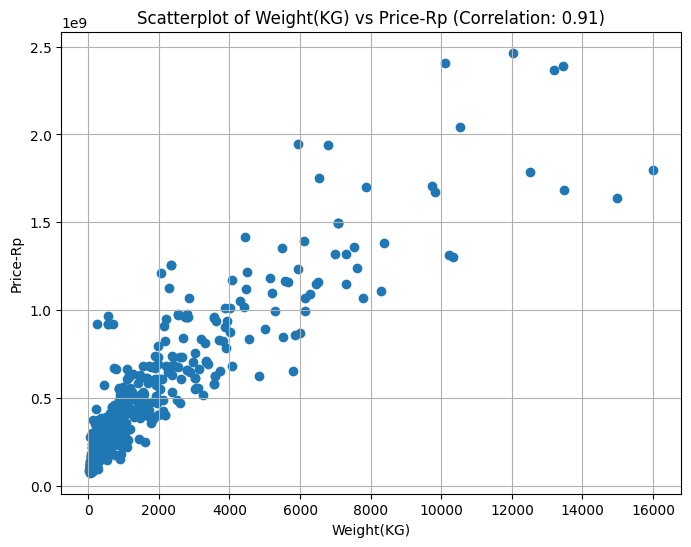

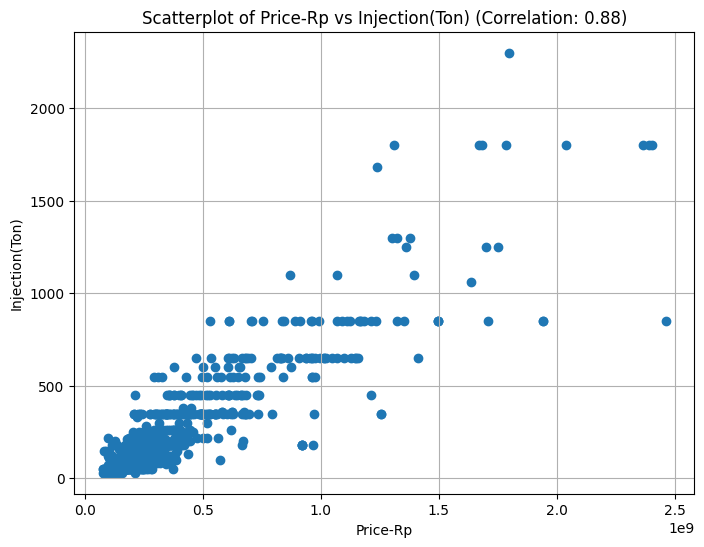

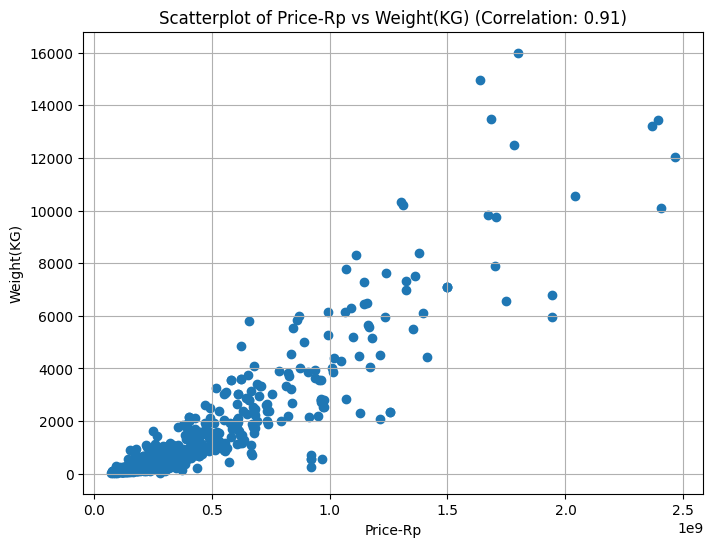

In [12]:
# Tampilkan scatter plot untuk setiap pasangan fitur dengan korelasi tinggi
for col1, col2 in high_corr_pairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col1], df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatterplot of {col1} vs {col2} (Correlation: {correlation_matrix.loc[col1, col2]:.2f})')
    plt.grid(True)
    plt.show()